In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn import model_selection
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV,KFold,LeaveOneOut,train_test_split
from sklearn.cluster import AgglomerativeClustering,hierarchical,KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
# !pip install xgboost
#from xgboost import XGBRegressor,XGBClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier




In [133]:
df =  pd.read_csv('train.csv')

In [134]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [135]:
df.shape

(891, 12)

In [136]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [137]:
(df.Survived.value_counts(normalize=True))*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

#### here we can say that data is imbalnced and somewhat favouring towards not survived.So we will use SMOTE to balance this imbalanced data on training data ahead

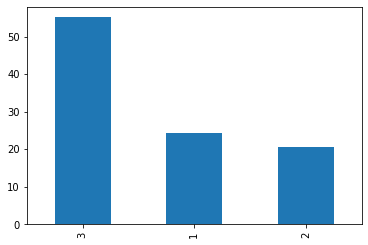

In [138]:
(df.Pclass.value_counts(normalize=True)*100).plot(kind='bar')
plt.show()

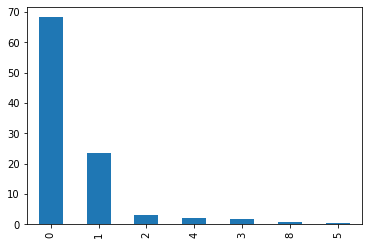

In [139]:
(df.SibSp.value_counts(normalize=True)*100).plot(kind='bar')
plt.show()

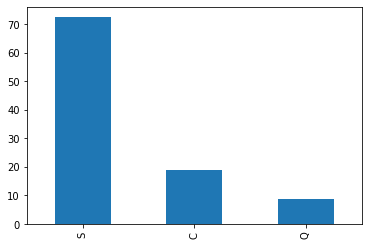

In [140]:
(df.Embarked.value_counts(normalize=100)*100).plot(kind='bar')
plt.show()

### calculating percentage of null value in Cabin column

In [141]:
print(((df.Cabin.isnull().sum()/len(df.Cabin))*100).round(2),"%")

77.1 %


In [142]:

pd.options.display.max_rows = None


##### exploring the possibilities of replacing null values in columns cabin

In [143]:
df[df['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.00,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.00,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S


In [144]:
df[df['Cabin'].isnull()]['Pclass'].value_counts()

3    479
2    168
1     40
Name: Pclass, dtype: int64

In [145]:
df[df['Cabin'].isnull()==False]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.00,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.00,1,0,PC 17572,76.7292,D33,C


In [146]:
df[df['Cabin'].isnull()==False]['Pclass'].value_counts()

1    176
2     16
3     12
Name: Pclass, dtype: int64

In [147]:
df[df['Cabin'].isnull()==False]['Pclass']

1      1
3      1
6      1
10     3
11     1
21     2
23     1
27     1
31     1
52     1
54     1
55     1
61     1
62     1
66     2
75     3
88     1
92     1
96     1
97     1
102    1
110    1
118    1
123    2
124    1
128    3
136    1
137    1
139    1
148    2
151    1
166    1
170    1
174    1
177    1
183    2
185    1
193    2
194    1
195    1
205    3
209    1
215    1
218    1
224    1
230    1
245    1
248    1
251    3
252    1
257    1
262    1
263    1
268    1
269    1
273    1
275    1
284    1
291    1
292    2
297    1
298    1
299    1
303    2
305    1
307    1
309    1
310    1
311    1
318    1
319    1
325    1
327    2
329    1
331    1
332    1
336    1
337    1
339    1
340    2
341    1
345    2
351    1
356    1
366    1
369    1
370    1
377    1
390    1
393    1
394    3
412    1
429    3
430    1
434    1
435    1
438    1
445    1
449    1
452    1
453    1
456    1
457    1
460    1
462    1
473    2
475    1
484    1
486    1
487    1
492    1
4

from the above analysis we can remove column 'Cabin'

In [148]:
df.drop('Cabin',axis=1,inplace=True)

In [149]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

##### checking if age column can be inputed or not

In [150]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,C


In [151]:
df[df['Age'].isnull()==False]['Pclass'].value_counts()

3    355
1    186
2    173
Name: Pclass, dtype: int64

In [152]:
df[df['Pclass']==3]['Age'].median()

24.0

##### imputing age column with median 24 here

In [153]:
df.Age = df.Age.replace({np.nan:24.0})

In [154]:
df.Age.isnull().sum()

0

In [155]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [156]:
df.dropna(axis=0,inplace=True)

In [157]:
df.drop(['PassengerId','Ticket','Name'],axis=1,inplace = True)

In [158]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

#### survival w.r.t Sex

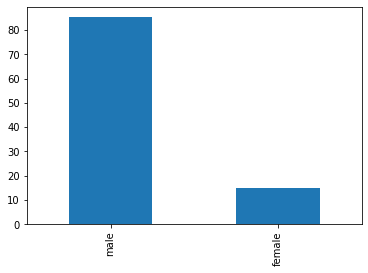

In [159]:
(df[df['Survived']==0]['Sex'].value_counts(normalize=True)*100).plot(kind='bar')
plt.show()

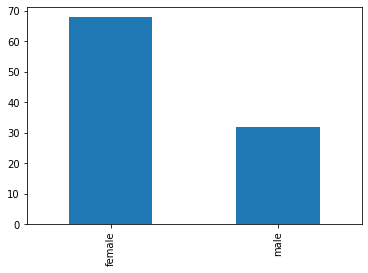

In [160]:
(df[df['Survived']==1]['Sex'].value_counts(normalize = True)*100).plot(kind='bar')
plt.show()

#### survival w.r.t Pclass

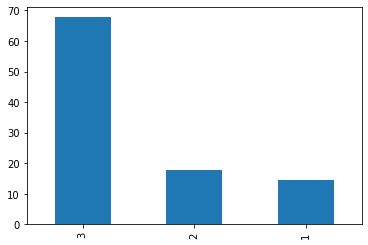

In [161]:
(df[df['Survived']==0]['Pclass'].value_counts(normalize=True)*100).plot(kind='bar')
plt.show()

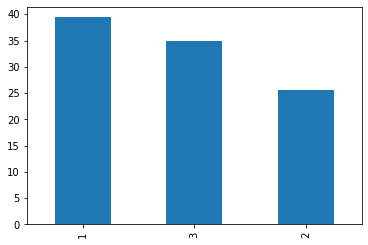

In [162]:
(df[df['Survived']==1]['Pclass'].value_counts(normalize=True)*100).plot(kind='bar')
plt.show()

In [163]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### survival w.r.t embarkation

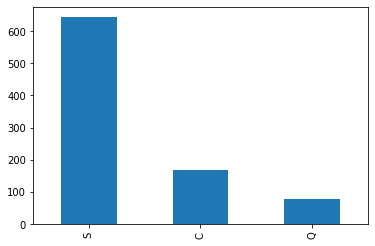

In [164]:
df.Embarked.value_counts().plot(kind='bar')
plt.show()

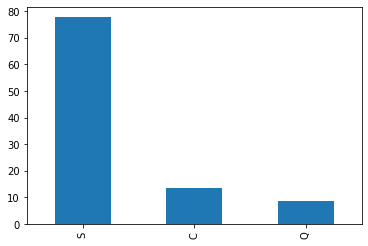

In [165]:
(df[df['Survived']==0]['Embarked'].value_counts(normalize=True)*100).plot(kind='bar')
plt.show()

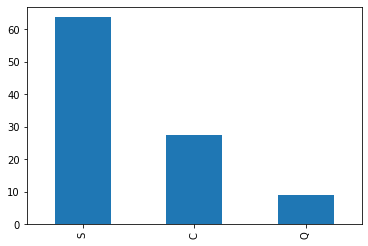

In [166]:
(df[df['Survived']==1]['Embarked'].value_counts(normalize=True)*100).plot(kind='bar')
plt.show()

In [167]:
df.SibSp.value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [168]:
df.Parch.value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [169]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

### converting to dummy variables

In [170]:
df = pd.get_dummies(data=df,columns= ['Pclass', 'Sex', 'SibSp', 'Parch','Embarked'])

In [171]:
pd.options.display.max_columns = None

In [172]:
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


### defining x and y 

In [173]:
x = df.drop('Survived',axis=1)

In [174]:
y = df.Survived

### Scaling data

In [175]:
from scipy.stats import zscore

In [176]:
x_scaled = x.apply(zscore)

In [177]:
x_scaled.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,-0.495519,-0.500240,-0.563060,-0.510875,0.900328,-0.735342,0.735342,-1.463333,1.803771,-0.180334,-0.135379,-0.143756,-0.075207,-0.089087,0.561328,-0.391213,-0.314464,-0.075207,-0.067229,-0.075207,-0.033558,-0.482711,-0.307941,0.616794
1,0.720711,0.788947,1.776008,-0.510875,-1.110706,1.359911,-1.359911,-1.463333,1.803771,-0.180334,-0.135379,-0.143756,-0.075207,-0.089087,0.561328,-0.391213,-0.314464,-0.075207,-0.067229,-0.075207,-0.033558,2.071634,-0.307941,-1.621287
2,-0.191461,-0.486650,-0.563060,-0.510875,0.900328,1.359911,-1.359911,0.683372,-0.554394,-0.180334,-0.135379,-0.143756,-0.075207,-0.089087,0.561328,-0.391213,-0.314464,-0.075207,-0.067229,-0.075207,-0.033558,-0.482711,-0.307941,0.616794
3,0.492668,0.422861,1.776008,-0.510875,-1.110706,1.359911,-1.359911,-1.463333,1.803771,-0.180334,-0.135379,-0.143756,-0.075207,-0.089087,0.561328,-0.391213,-0.314464,-0.075207,-0.067229,-0.075207,-0.033558,-0.482711,-0.307941,0.616794
4,0.492668,-0.484133,-0.563060,-0.510875,0.900328,-0.735342,0.735342,0.683372,-0.554394,-0.180334,-0.135379,-0.143756,-0.075207,-0.089087,0.561328,-0.391213,-0.314464,-0.075207,-0.067229,-0.075207,-0.033558,-0.482711,-0.307941,0.616794


# Building Models

### Logistic Regression

In [178]:
import statsmodels.api as sm

In [179]:
X_1 = sm.add_constant(x_scaled)
X_1.head()

,const,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,1.0,-0.495519,-0.500240,-0.563060,-0.510875,0.900328,-0.735342,0.735342,-1.463333,1.803771,-0.180334,-0.135379,-0.143756,-0.075207,-0.089087,0.561328,-0.391213,-0.314464,-0.075207,-0.067229,-0.075207,-0.033558,-0.482711,-0.307941,0.616794
1,1.0,0.720711,0.788947,1.776008,-0.510875,-1.110706,1.359911,-1.359911,-1.463333,1.803771,-0.180334,-0.135379,-0.143756,-0.075207,-0.089087,0.561328,-0.391213,-0.314464,-0.075207,-0.067229,-0.075207,-0.033558,2.071634,-0.307941,-1.621287
2,1.0,-0.191461,-0.486650,-0.563060,-0.510875,0.900328,1.359911,-1.359911,0.683372,-0.554394,-0.180334,-0.135379,-0.143756,-0.075207,-0.089087,0.561328,-0.391213,-0.314464,-0.075207,-0.067229,-0.075207,-0.033558,-0.482711,-0.307941,0.616794
3,1.0,0.492668,0.422861,1.776008,-0.510875,-1.110706,1.359911,-1.359911,-1.463333,1.803771,-0.180334,-0.135379,-0.143756,-0.075207,-0.089087,0.561328,-0.391213,-0.314464,-0.075207,-0.067229,-0.075207,-0.033558,-0.482711,-0.307941,0.616794
4,1.0,0.492668,-0.484133,-0.563060,-0.510875,0.900328,-0.735342,0.735342,0.683372,-0.554394,-0.180334,-0.135379,-0.143756,-0.075207,-0.089087,0.561328,-0.391213,-0.314464,-0.075207,-0.067229,-0.075207,-0.033558,-0.482711,-0.307941,0.616794


In [180]:
result = sm.Logit(y,X_1)

In [181]:
final = result.fit()

         Current function value: 0.431444
         Iterations: 35


In [182]:
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      869
Method:                           MLE   Df Model:                           19
Date:                Tue, 24 Mar 2020   Pseudo R-squ.:                  0.3515
Time:                        15:02:30   Log-Likelihood:                -383.55
converged:                      False   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 2.355e-76
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0955   1.88e+04  -5.82e-05      1.000   -3.69e+04    3.69e+04
Age           -0.4509      0.108     -4.178      0.000      -0.662      -0.239
Fare           0.1190      0.124      0.960      0.337      -0.124       0.362
Pclass_1       0.4692        nan        nan        nan         nan         nan
Pclass_2       0.0623        nan        nan        nan         nan         nan
Pclass_3      -0.4541        nan        nan        nan         nan         nan
Sex_female     0.6374   6.34e+06      1e-07      1.000   -1.24e+07    1.24e+07
Sex_male      -0.6374   6.34e+06  -1.01e-07      1.000   -1.24e+07    1.24e+07
SibSp_0        0.4271   5.93e+06    7.2e-08      1.000   -1.16e+07    1.16e+07
SibSp_1        0.4357   3.44e+06   1.27e-07      1.000   -6.74e+06    6.74e+06
SibSp_2        0.1173        nan        nan        nan         nan         nan
SibSp_3       -0.1703   1.46e+06  -1.17e-07      1.000   -2.85e+06    2.85e+06
SibSp_4       -0.1004        nan        nan        nan         nan         nan
SibSp_5       -2.2689        nan        nan        nan         nan         nan
SibSp_8       -2.2369        nan        nan        nan         nan         nan
Parch_0        0.0618        nan        nan        nan         nan         nan
Parch_1        0.1883        nan        nan        nan         nan         nan
Parch_2        0.0722        nan        nan        nan         nan         nan
Parch_3        0.0339        nan        nan        nan         nan         nan
Parch_4       -1.3745        nan        nan        nan         nan         nan
Parch_5       -0.0816        nan        nan        nan         nan         nan
Parch_6       -0.4582        nan        nan        nan         nan         nan
Embarked_C     0.0524        nan        nan        nan         nan         nan
Embarked_Q     0.0422        nan        nan        nan         nan         nan
Embarked_S    -0.0725        nan        nan        nan         nan         nan
==============================================================================
"""

In [183]:
final.pvalues

const         0.999954
Age           0.000029
Fare          0.336848
Pclass_1           NaN
Pclass_2           NaN
Pclass_3           NaN
Sex_female    1.000000
Sex_male      1.000000
SibSp_0       1.000000
SibSp_1       1.000000
SibSp_2            NaN
SibSp_3       1.000000
SibSp_4            NaN
SibSp_5            NaN
SibSp_8            NaN
Parch_0            NaN
Parch_1            NaN
Parch_2            NaN
Parch_3            NaN
Parch_4            NaN
Parch_5            NaN
Parch_6            NaN
Embarked_C         NaN
Embarked_Q         NaN
Embarked_S         NaN
dtype: float64

### Backward Eliminatiion

here we will remove all the features whose value is insignificant that is greater than 0.05

In [184]:
X_1 = X_1.drop(['Fare','Sex_female','Sex_male','SibSp_0','SibSp_1','SibSp_3'],axis=1)

In [185]:
X_1.columns

Index(['const', 'Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'SibSp_2',
       'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2',
       'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [186]:
from sklearn.model_selection import train_test_split 

In [187]:
x_train,x_test,y_train,y_test = train_test_split(X_1,y,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((622, 19), (267, 19), (622,), (267,))

In [188]:
from sklearn.linear_model import LogisticRegression

In [189]:
lr = LogisticRegression()
model= lr.fit(x_train,y_train)

In [190]:
model.score(x_train,y_train)

0.7347266881028939

In [191]:
model.score(x_test,y_test)

0.7078651685393258

In [192]:
y_pred=model.predict(x_test)

In [193]:
from sklearn.metrics import classification_report

In [194]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79       162
           1       0.74      0.40      0.52       105

    accuracy                           0.71       267
   macro avg       0.72      0.65      0.65       267
weighted avg       0.71      0.71      0.68       267



In [195]:
from sklearn.metrics import accuracy_score

In [196]:
accuracy_score(y_test,y_pred)

0.7078651685393258

In [197]:
from sklearn.metrics import confusion_matrix

In [198]:
confusion_matrix(y_test,y_pred)

array([[147,  15],
       [ 63,  42]], dtype=int64)

# all models

#### splitting scaled data into train and test for other models without constant

In [199]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((711, 24), (178, 24), (711,), (178,))

#### using SMOTE before building model to remove data imbalance

In [200]:
from imblearn.over_sampling import SMOTE

In [201]:
smo = SMOTE(random_state = 1)

In [202]:
x_train,y_train =smo.fit_sample(x_train,y_train.ravel())

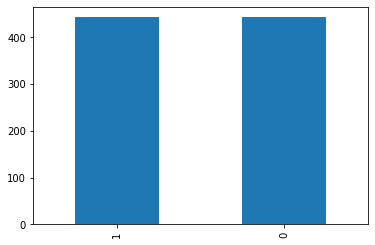

In [203]:
pd.Series(y_train).value_counts().plot(kind='bar')

#### now data is balanced

### f1_weighted metrics

#### for multi_variate model f1_wieghted score is the gold standard metrics

In [204]:
LR=LogisticRegression()
NB=GaussianNB()
KNN=KNeighborsClassifier(n_neighbors=9,weights='distance')
DT=DecisionTreeClassifier()
RF=RandomForestClassifier(criterion='entropy',n_estimators=10)
Bagged=BaggingClassifier(n_estimators=50)
AdaBoost=AdaBoostClassifier(n_estimators=50)
AB_RF=AdaBoostClassifier(base_estimator=RF,n_estimators=100)
GBoost=GradientBoostingClassifier(n_estimators=100)
stacked = VotingClassifier(estimators = [('GBoost',GBoost),('Boost_RF', AB_RF), ('Bagged', Bagged)])

In [205]:
models = []
models.append(('Logistic', LR))
models.append(('NaiveBayes', NB))
models.append(('KNN',KNN))
models.append(('DT',DT))
models.append(('RandomForest',RF))
models.append(('Bagged',Bagged))
models.append(('AdaBoost',AdaBoost))
models.append(('AdaBoostRF',AB_RF))
models.append(('GradientBoost',GBoost))
models.append(('VotingClassifier',stacked))

In [206]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=1)
	cv_results = model_selection.cross_val_score(model, x_train, y_train,cv=kfold, scoring='f1_weighted')
	results.append(cv_results)
	names.append(name)
	print("{}   {} ".format(name, np.mean(cv_results)))


Logistic   0.8026099357853596 
NaiveBayes   0.3935762990945687 
KNN   0.8113792203673412 
DT   0.8172718296549227 
RandomForest   0.8397569373797967 
Bagged   0.8432164838613682 
AdaBoost   0.7981607286997678 
AdaBoostRF   0.8240879561162509 
GradientBoost   0.8193780062981325 
VotingClassifier   0.8420431684233431 


# lets build model by imputing missing values by using Iterative Imputer

#### loading the data

In [207]:
df = pd.read_csv('train.csv')

In [208]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [209]:
df.shape

(891, 12)

In [210]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### here we will drop cabin column

In [211]:
(df.Cabin.isnull().sum()/df.Cabin.shape[0])*100

77.10437710437711

missing value is 77% of the total number of observation so we will drop

In [212]:
df = df.drop('Cabin',axis=1)

##### now we will remove 2 missing values in Embarked columns

In [213]:
df.Embarked.dropna(axis=0,inplace=True)

In [214]:
df.Embarked.isnull().sum()

0

#### dropping useless columns

In [215]:
df.drop('Name',axis=1,inplace=True)

In [216]:
df.drop(['PassengerId','Ticket'],axis=1,inplace=True)

#### creating dummies 

In [217]:
df = pd.get_dummies(data = df,columns = ['Sex','Embarked','SibSp','Parch'])

In [218]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'SibSp_0', 'SibSp_1',
       'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0',
       'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6'],
      dtype='object')

###### now we will impute Age columns with Iterativeimputer

In [219]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [220]:
from sklearn.ensemble import RandomForestRegressor

In [221]:
imp = IterativeImputer(estimator = RandomForestRegressor(),max_iter=10,random_state=1)

In [222]:
df = pd.DataFrame(imp.fit_transform(df),columns = df.columns)

In [223]:
df.isnull().sum()

Survived      0
Pclass        0
Age           0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
dtype: int64

###### splitting target and independent variable

In [224]:
y = df.Survived

In [225]:
x = df.drop('Survived',axis=1)

##### scaling data

In [226]:
x_scaled = x.apply(zscore)

In [227]:
x_scaled.head()

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0.827377,-0.563284,-0.502445,-0.737695,0.737695,-0.482043,-0.307562,0.619306,-1.465746,1.806421,-0.180125,-0.135225,-0.143592,-0.075122,-0.088986,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352
1,-1.566107,0.599728,0.786845,1.355574,-1.355574,2.074505,-0.307562,-1.614710,-1.465746,1.806421,-0.180125,-0.135225,-0.143592,-0.075122,-0.088986,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352
2,0.827377,-0.272531,-0.488854,1.355574,-1.355574,-0.482043,-0.307562,0.619306,0.682247,-0.553581,-0.180125,-0.135225,-0.143592,-0.075122,-0.088986,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352
3,-1.566107,0.381663,0.420730,1.355574,-1.355574,-0.482043,-0.307562,0.619306,-1.465746,1.806421,-0.180125,-0.135225,-0.143592,-0.075122,-0.088986,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352
4,0.827377,0.381663,-0.486337,-0.737695,0.737695,-0.482043,-0.307562,0.619306,0.682247,-0.553581,-0.180125,-0.135225,-0.143592,-0.075122,-0.088986,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352


###### now missing values is treated

### now we will start building our  model

In [228]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((712, 22), (179, 22), (712,), (179,))

#### using SMOTE before building model to remove data imbalance

In [229]:
smo = SMOTE(random_state = 1)

In [230]:
x_train,y_train =smo.fit_sample(x_train,y_train.ravel())

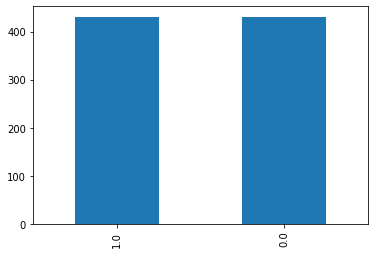

In [231]:
pd.Series(y_train).value_counts().plot(kind='bar')

In [232]:
LR=LogisticRegression()
NB=GaussianNB()
KNN=KNeighborsClassifier(n_neighbors=9,weights='distance')
DT=DecisionTreeClassifier()
RF=RandomForestClassifier(criterion='entropy',n_estimators=10)
Bagged=BaggingClassifier(n_estimators=50)
AdaBoost=AdaBoostClassifier(n_estimators=50)
AB_RF=AdaBoostClassifier(base_estimator=RF,n_estimators=100)
GBoost=GradientBoostingClassifier(n_estimators=100)
stacked = VotingClassifier(estimators = [('GBoost',GBoost),('Boost_RF', AB_RF), ('Bagged', Bagged)])

In [233]:
models = []
models.append(('Logistic_IterativeImputer', LR))
models.append(('NaiveBayes_IterativeImputer', NB))
models.append(('KNN_IterativeImputer',KNN))
models.append(('DT_IterativeImputer',DT))
models.append(('RandomForest_IterativeImputer',RF))
models.append(('Bagged_IterativeImputer',Bagged))
models.append(('AdaBoost_IterativeImputer',AdaBoost))
models.append(('AdaBoostRF_IterativeImputer',AB_RF))
models.append(('GradientBoost_IterativeImputer',GBoost))
models.append(('VotingClassifier_IterativeImputer',stacked))

In [234]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=1)
	cv_results = model_selection.cross_val_score(model, x_train, y_train,cv=kfold, scoring='f1_weighted')
	results.append(cv_results)
	names.append(name)
	print("{}   {} ".format(name, np.mean(cv_results)))


Logistic_IterativeImputer   0.7931619030370631 
NaiveBayes_IterativeImputer   0.38108592210958736 
KNN_IterativeImputer   0.8071791856252275 
DT_IterativeImputer   0.794938712903468 
RandomForest_IterativeImputer   0.817664137984145 
Bagged_IterativeImputer   0.831699608631868 
AdaBoost_IterativeImputer   0.8048032518236928 
AdaBoostRF_IterativeImputer   0.8154862121975487 
GradientBoost_IterativeImputer   0.8256633952087974 
VotingClassifier_IterativeImputer   0.8271072945541903 


## now we will try KNN Imputer to treat missing values and build model

In [235]:
from sklearn.impute import KNNImputer

In [236]:
df = pd.read_csv('train.csv')

In [237]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### here we will drop cabin column

In [238]:
(df.Cabin.isnull().sum()/df.Cabin.shape[0])*100

77.10437710437711

In [239]:
df = df.drop('Cabin',axis=1)

##### now we will remove 2 missing values in Embarked columns

In [240]:
df.Embarked.dropna(axis=0,inplace=True)

In [241]:
df.Embarked.isnull().sum()

0

##### dropping useless columns

In [242]:
df.drop(['PassengerId','Ticket'],axis=1,inplace=True)

In [243]:
df.drop('Name',axis=1,inplace=True)

#### creating dummies

In [244]:
df = pd.get_dummies(data = df,columns = ['Sex','Embarked','SibSp','Parch'])

#### now we will impute Age columns with KNNimputer

In [245]:
from sklearn.impute import KNNImputer

In [246]:
knnimp = KNNImputer(n_neighbors = 2)

In [247]:
df = pd.DataFrame(knnimp.fit_transform(df),columns = df.columns)

In [248]:
df.isnull().sum()

Survived      0
Pclass        0
Age           0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
dtype: int64

#### splitting target and independent variable

In [249]:
y = df.Survived

In [250]:
x = df.drop('Survived',axis=1)

#### scaling data

In [251]:
x_scaled = x.apply(zscore)

In [252]:
x_scaled.head()

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0.827377,-0.586876,-0.502445,-0.737695,0.737695,-0.482043,-0.307562,0.619306,-1.465746,1.806421,-0.180125,-0.135225,-0.143592,-0.075122,-0.088986,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352
1,-1.566107,0.528633,0.786845,1.355574,-1.355574,2.074505,-0.307562,-1.614710,-1.465746,1.806421,-0.180125,-0.135225,-0.143592,-0.075122,-0.088986,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352
2,0.827377,-0.307999,-0.488854,1.355574,-1.355574,-0.482043,-0.307562,0.619306,0.682247,-0.553581,-0.180125,-0.135225,-0.143592,-0.075122,-0.088986,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352
3,-1.566107,0.319475,0.420730,1.355574,-1.355574,-0.482043,-0.307562,0.619306,-1.465746,1.806421,-0.180125,-0.135225,-0.143592,-0.075122,-0.088986,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352
4,0.827377,0.319475,-0.486337,-0.737695,0.737695,-0.482043,-0.307562,0.619306,0.682247,-0.553581,-0.180125,-0.135225,-0.143592,-0.075122,-0.088986,0.560499,-0.390707,-0.314076,-0.075122,-0.067153,-0.075122,-0.03352


now missing values is treated with KNN Imputer

### now we will start building our model

In [253]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((712, 22), (179, 22), (712,), (179,))

#### using SMOTE before building model to remove data imbalance

In [254]:
smo = SMOTE(random_state = 1)

In [255]:
x_train,y_train =smo.fit_sample(x_train,y_train.ravel())

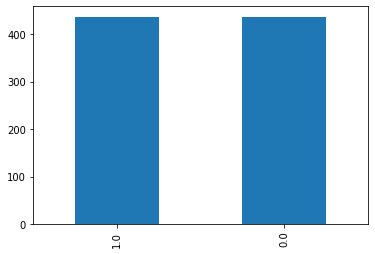

In [256]:
pd.Series(y_train).value_counts().plot(kind='bar')

In [257]:
LR=LogisticRegression()
NB=GaussianNB()
KNN=KNeighborsClassifier(n_neighbors=9,weights='distance')
DT=DecisionTreeClassifier()
RF=RandomForestClassifier(criterion='entropy',n_estimators=10)
Bagged=BaggingClassifier(n_estimators=50)
AdaBoost=AdaBoostClassifier(n_estimators=50)
AB_RF=AdaBoostClassifier(base_estimator=RF,n_estimators=100)
GBoost=GradientBoostingClassifier(n_estimators=100)
stacked = VotingClassifier(estimators = [('GBoost',GBoost),('Boost_RF', AB_RF), ('Bagged', Bagged)])

In [258]:
models = []
models.append(('Logistic_KNN', LR))
models.append(('NaiveBayes_KNN', NB))
models.append(('KNN__KNN',KNN))
models.append(('DT__KNN',DT))
models.append(('RandomForest__KNN',RF))
models.append(('Bagged__KNN',Bagged))
models.append(('AdaBoost__KNN',AdaBoost))
models.append(('AdaBoostRF__KNN',AB_RF))
models.append(('GradientBoost__KNN',GBoost))
models.append(('VotingClassifier__KNN',stacked))

In [259]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=1)
	cv_results = model_selection.cross_val_score(model, x_train, y_train,cv=kfold, scoring='f1_weighted')
	results.append(cv_results)
	names.append(name)
	print("{}   {} ".format(name, np.mean(cv_results)))


Logistic_KNN   0.7972629440888861 
NaiveBayes_KNN   0.4000707257567278 
KNN__KNN   0.8098386830510684 
DT__KNN   0.8007235176338675 
RandomForest__KNN   0.8224742795704097 
Bagged__KNN   0.8236663568815736 
AdaBoost__KNN   0.7951028600496779 
AdaBoostRF__KNN   0.8188676936089234 
GradientBoost__KNN   0.8267714682256159 
VotingClassifier__KNN   0.8370419732884488 


#### Now we will compare of our models based on missing values treatment

#### from the above results on the basis of missing value imputation we can conclude that Bagged with   0.8432164838613682 f1_weighted is the best model to predict survival.